##highly inspired by Nicholas Renotte 

In [191]:
import cv2
import easyocr
from matplotlib import pyplot as plt
import numpy as np
import imutils

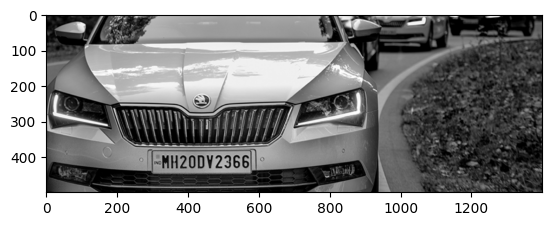

In [192]:
img=cv2.imread('image9.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

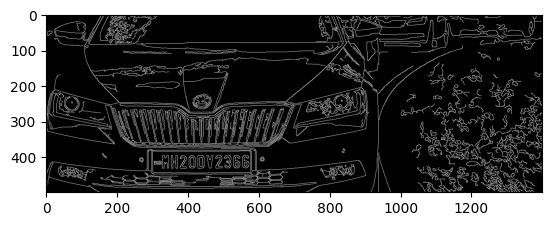

In [193]:
bfilter=cv2.bilateralFilter(gray,11,17,17)#noise reduction 
edged=cv2.Canny(bfilter,10,200)#edge detection 
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

In [194]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [195]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [196]:
location

array([[[300, 387]],

       [[303, 445]],

       [[577, 443]],

       [[574, 384]]], dtype=int32)

In [197]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

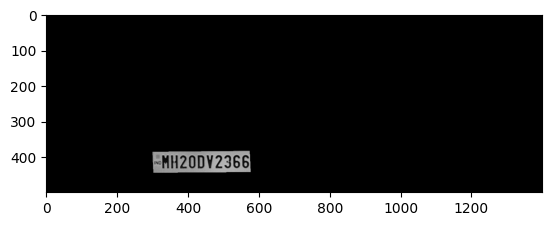

In [198]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

In [199]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

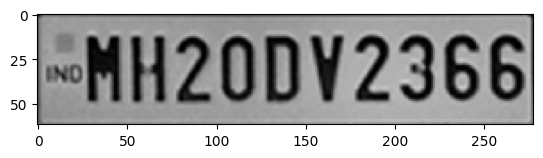

In [200]:
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))

In [201]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[3, 27], [27, 27], [27, 41], [3, 41]], '[4o', 0.07458649779593057),
 ([[18, 2], [278, 2], [278, 57], [18, 57]], "'NHZODV2366", 0.2576972321610003)]

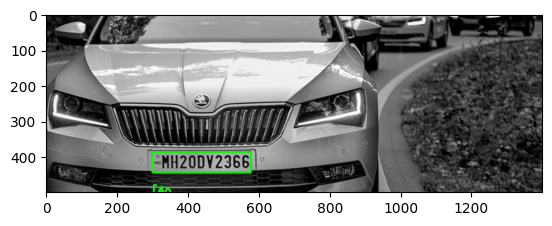

In [202]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=3, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))